# Gapminder World Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">The Gapminder Data</a></li>
 <ul>
    <li><a href="#birthrates">Birth Rates</a>
    <li><a href="#income">Income</a>
    <li><a href="#gini">Gini Index</a>
 </ul>
<li><a href="#question">Income and Birth Rates: Causation or Correlation?</a></li>
<li><a href="#structuring">Structuring the Data: All about regions</a></li>
<li><a href="#orientation">Orientation in Data: China and the Middle East</a></li>
<li><a href="#exploration">Explore the Data: How strong is the correlation between fertility and income?</a></li>
 <ul>
    <li><a href="#middleeast">Middle East: If the income is shrinking does the fertility raise?</a></li>
    <li><a href="#neareast">Zoom in Near East: If the income is stagnating on a low level why did fertility drop anywway? </a></li>
    <li><a href="#africa">Africa: Are there countries with low stagnating incomes and dropping birthrates?</a></li>
    <li><a href="#northafrica">Zoom in North Africa: Why is the correlation between income and Birthrates the weakest of all regions?</a></li>
     <li><a href="#libya">Zoom in Libya: Raising income and more babies?</a></li>
     <li><a href="#oil">Zoom in Oil States: Oil and Babies</a></li>     
    <li><a href="#asia">Asia</a></li>
    <li><a href="#china"> Zoom in China: When politics interferes ...</a></li>
    <li><a href="#america">America</a></li>
    <li><a href="#europe">Europe</a></li>
    <li><a href="#russia">Zoom in Russia: Fear and Income</a></li>
 </ul>
 <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction
<img src="images/factfullness.png" width="100" height="400" align="right">When I first read the book "Factfullness" by Hans Rosling, I was suspicious. The world is different and much better than you think, his main message seemed to be. My intuition contradicted him. When I discovered this Udacity project about Gapminder, I was therefore thrilled about the opportunity to deal with one of Rosling's main theses: 
<b font size="2">People who escape poverty have fewer children.</b>


<a id='wrangling'></a>
## The Gapminder Data
The data provided by Gapminder is collected from different sources (historic – a bit intransparent, UN, World Health Organisation, a.s.o), combined and already prepared: there are no gaps (null values) or duplicates. The so called indicators are simple time series sorted by country and year. Country names are used consistently across all tables (indicators). The numerical values are floats throughout. So there is no need to adapt data types anywhere.  

In order to investigate the relationship between income and birth rate, I selected the following indicators from the Gapminder data offer:
<ul>
<li>Babies per woman (total fertility rate) (dependent data)</li>
<li>GDP per capita in constant PPP dollars (independent data)</li>
<li>Gini (independent data)</li>
<li>Child Mortality Rate, under age five (independent data ?)</li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_fertility = pd.read_csv('data/children_per_woman_total_fertility.csv')
df_income = pd.read_csv('data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_gini = pd.read_csv('data/si_pov_gini.csv')

<a id='birthrates'></a>
## Birth Rates
Gapminder as a non-profit organization collected historical data for example on birth rates of individual countries (1800-1950), and combined them with the corresponding data published by the UN (1950 – 2014). Data after 2014 come from the UN forecasts. 
https://www.gapminder.org/data/documentation/gd008/


In [3]:
#Countries with missing fertility rates
df_fertility[df_fertility.isnull().any(axis=1)].shape[0]
# Duplicates in fertility data: 
df_fertility[df_fertility.duplicated('country')].shape[0]
# controlling types
df_fertility.dtypes
type(df_fertility['country'][0])

str

<a id='income'></a>
## Income
“GDP per capita measures the value of everything produced in a country during a year, divided by the number of people. The unit is in international dollars, fixed 2011 prices. The data is adjusted for inflation and differences in the cost of living between countries, so-called PPP dollars. The end of the time series, between 1990 and 2016, uses the latest GDP per capita data from the World Bank, from their World Development Indicators. To go back in time before the World Bank series starts in 1990, we have used several sources, such as Angus Maddison. A simplistic way to combine GDP per capita from multiple sources would be to take the levels of the modern data and just apply the historic growth rates to the modern numbers, thereby estimating our way back in time for each country. Whenever new PPP estimates are released, the countries’ relative positions back in history would change, as the complete time-series would move for all previous years. To avoid this, we have used a couple of cross-country comparisons for earlier years, as documented in version 14 below, including Maddison. We make sure that our historic estimates are not affected by new releases of World Bank data, by adjusting the growth rates between the historic benchmarks and 1990, so that the historical relative levels of countries are maintained.” https://www.gapminder.org/data/documentation/gd001/ 


In [4]:
# Countries with missing income values
df_income[df_income.isnull().any(axis=1)].shape[0]
# Duplicates in income data:
df_income[df_income.duplicated('country')].shape[0]
df_income.dtypes
type(df_income['country'][0])

str

<a id='gini'></a>
## Income Distribution
A good explaination for the Gini index comes from Gapminder istself: “Gini measures inequality: How large are the income differences within a society. First imagine you line up all people in a country, ordered by income: The poorest to the left and the richest to the right. Now you walk from the left to the right asking how much money they earn every year, and you add up the number. When you reach the middle, you have counted 50% of the people, but the richest half remains. The amount of income you have added up is much less than 50% of all the money, say , maybe 20%. Maybe 10%? If there are lots of people with low incomes, you will have added maybe 15% of the money for the poorest half of the population, but if the income differences are less extreme, the 50% poorest may earn 30% of the incomes. If everybody earns the same, you would have gotten to 50% of the money, after asking 50% of the people. In that case (which never happens), the gini is zero. No inequality. The opposite extreme case (which also never happens) would be that only the richest person has any income: one guy earns all the money.  Then the gini is 1. Perfect inequality. But most countries have a gini somewhere around 0.4, in-between these two extreme examples.”


<a id='question'></a>
## Income and Birth Rates: Causation or Correlation?
For a long period of 165 years around 6 babies were born in average to each woman.  But starting in the midth of the 60s the birth rate line started dropping to almost 2 children per woman. That means in average we as a worldwide population reached the state of simple reproduction. In the words of Mr. Hans Rosling, the Swedish physician who founded Gapminder: “The vast majority of the billions of people who were able to leave their extreme poverty behind chose to have fewer children.” (Factfullness, p. 107, German Edition) 
Of course, the Gapminder founder does not assume that rising income is the only reason for falling birth rates. He counts less physical labor in agriculture, falling child mortality, better education and access to contraceptives as key factors. But all of these improvements are based on rising incomes. 
So we start with the simple assumption that income and birth rates correlate negatively.
If we only look at the global average, there is nothing wrong with this thesis:

<Figure size 432x288 with 0 Axes>

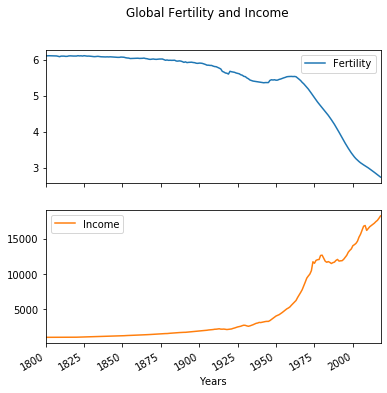

In [5]:
def plot_in_parallel(df_data, colx, coly, title):
    """Plots the columns of a data frame in parallel plots with aligned x axes 
    
    Parameters:
    df_data (data frame): data frame to be plotted
    
    """
    plt.figure();
    df_data.plot(subplots=True, title=title, figsize=(6, 6), legend=True); 
    #plt.legend(loc='best');   
    plt.xlabel(colx)
   
    
df_income_mean = df_income.mean().to_frame()
df_income_mean.rename(columns={df_income_mean.columns[0]:'Income'}, inplace=True)
#df_income_mean = df_income_mean.loc['1940':'2018', :]

df_fert_mean = df_fertility.mean().to_frame()
df_fert_mean.rename(columns={df_fert_mean.columns[0]:'Fertility'}, inplace=True)
#df_fert_mean = df_fert_mean.loc['1940': '2018', :]

df_mean_merged = df_fert_mean.merge(df_income_mean, how='inner', left_index=True, right_index=True)
plot_in_parallel(df_mean_merged, 'Years', 'Income in $', 'Global Fertility and Income');


<img src="images/cases.png" width="400" height="400" align="right">But what exactly does a negative correlation mean in our case? Does it only mean that rising incomes provoke fewer babies? What about the reverse case: if the incomes fall, more children would be born again? And if income stagnates, birth rates stagnate. 
I have summarized all possible cases in the following overview. The dark gray diagonal shows the combinations that fit a strong negative correlation. The fields in light gray contradict a strong negative correlation:</span>


Averages are all well and good, can the thesis in question be confirmed if we zoom into the data starting from the global average?

<a id='structuring'></a>
## Structuring the Data: All about regions
The first attempt to go straight to the country level doesn't bring much clarity. 

In [6]:
def transform(df_data):
    """ Switch lines and columns
    
    Parameters:
    df_data (data frame): data frame to be transformed by switching lines and columns
    
    Return:
    dataframe with exchanged lines and columns
    """
        
    df_data = df_data.transpose()
    df_data.rename(columns=df_data.iloc[0], inplace=True)
    df_data.drop(df_data.index[0], inplace=True)
    return df_data

df_fertility_trans = transform(df_fertility)
df_income_trans = transform(df_income)
#df_fertility_trans.plot(kind='line', figsize=(8,8));

A better approach is to group countries by region. The most obvious approach was to define the individual continents as regions. The fact that this was not a good idea was most evident in Europe. If we combine Eastern and Western Europe, we get an income level that is far below the United States. Europe appears to be a relatively poor continent, but it is not, at least not the western parts. 

The same applies to the Near East and the Middle East, which I also initially lumped together. 
Due to different history, religion and culture Africa was also divided into different parts. Since I am not familiar with South American history, I was unable to find an appropriate division in the case of South America. The same applies to Asia, which I devided by intuition but maybe not in the best way. I am aware that this can lead to distortions in my investigation.

How these regions are summarized has an immense impact on the type of trends we generate. For example, if we have a very large country within a group of medium and small states, the characteristics of the lightweights disappear in the shadow of the group champion. That is why I decided to treat the heavyweights among the states as separate regions. This affects China, India, Russia and Japan. Contrary to this strategy, I have combined the United States with Canada because Canada can hardly form a region on its own. 

In [7]:
def print_groups(groups):
    """ Print out groups 
    
    Parameters:
    groups (group object): groups to be printed out

    """
    for key, item in groups:
        print(key)
        for row_index, row in item.iterrows():
            print('  - {}'.format(row_index))
        
df_region = pd.read_csv('data/regions.csv')
df_region.set_index('country', inplace=True)
print_groups(df_region.groupby('region'))

Africa (Central)
  - Benin
  - Cameroon
  - Africa (Central)n Republic
  - Congo, Dem. Rep.
  - Congo, Rep.
  - Cote d'Ivoire
  - Equatorial Guinea
  - Eritrea
  - Ethiopia
  - Gabon
  - Gambia
  - Ghana
  - Guinea
  - Guinea-Bissau
  - Liberia
  - Mauritius
  - Niger
  - Nigeria
  - Senegal
  - Sierra Leone
  - Somalia
  - Togo
  - Tonga
  - Uganda
Africa (North)
  - Algeria
  - Burkina Faso
  - Chad
  - Egypt
  - Libya
  - Mali
  - Mauritania
  - Morocco
  - South Sudan
  - Sudan
  - Tunisia
Africa (South)
  - Angola
  - Botswana
  - Burundi
  - Kenya
  - Lesotho
  - Madagascar
  - Malawi
  - Mozambique
  - Namibia
  - Rwanda
  - South Africa
  - Swaziland
  - Tanzania
  - Zambia
  - Zimbabwe
America (Middle)
  - Belize
  - Dominican Republic
  - El Salvador
  - Grenada
  - Guatemala
  - Honduras
  - Mexico
  - Nicaragua
  - Panama
America (North)
  - Canada
  - United States
America (South)
  - Argentina
  - Bolivia
  - Brazil
  - Chile
  - Colombia
  - Costa Rica
  - Ecuador
  - Gu

In [8]:
def merge_regions(df_region, df_data):
    """ Add an new column to the given data frame containing the region to which the country in the row belongs to 
    
    Parameters:
    df_region (data frame): data frame contains the mapping between country and region
    df_data (data frame): data frames contains Gapminder data wiht country as index and years as columns
    
    Return:
    merged data frame

    """
    df_region_merged = df_data.merge(df_region, on='country', how='left')
    return df_region_merged

df_fert_region = merge_regions(df_region, df_fertility)
df_income_region = merge_regions(df_region, df_income) 

In [9]:
def mean_by_regions (df_data): 
    """ Calculating means per region, transposing th result
    
    Parameters:
    df_data (data frame): Gapminder data frame with merged region
    
    Return:
    mean per region (data frame): data frame containing regions as columns and years as rows

    """
    df_mean_region = df_data.groupby('region').mean()
    df_mean_region = df_mean_region.transpose()
    return df_mean_region

df_mean_fert_region_trans = mean_by_regions(df_fert_region)
df_mean_income_region_trans = mean_by_regions(df_income_region)

In [10]:
df_mean_fert_region_trans = df_mean_fert_region_trans.loc['1940':'2018', :]
df_mean_income_region_trans = df_mean_income_region_trans.loc['1940':'2018', :]

<a id='orientation'></a>
## Orientation in Data: China and the Middle East
The most striking pattern with the broadest range of birth rates can be found in China. Therefore this curve is added to  the representation of all continents and facilitates the comparison between the continents.


For the income data, we find a similarly striking pattern for the Middle East.

In [11]:
def plot_regions(df_data, regions, title, ylabel):
    """ Plotting data frame with columns as regions and rows as years
    
    Parameters:
    df_data (data frame): data frame with columns as regions and rows as years
    regions (array): array containing region names which are use for filtering th egiven data frame

    """
    df_data_regions = df_data.loc['1940':'2018', regions]
    plt.figure();
    df_data_regions.plot(kind='line', figsize=(6,6), title=title);
    plt.xlabel('Years')
    plt.ylabel(ylabel)

In [12]:
# region groups to be plotted together - all contain China as reference - used for plotting fertility
arr_africa = pd.array(['Africa (Central)', 'Africa (North)','Africa (South)', 'China'], dtype='str')
arr_europe = pd.array(['Europe (West)', 'Europe (East)','Europe (South)', 'Russia', 'China'])
arr_america = pd.array(['America (North)', 'America (Middle)','America (South)', 'Caribic', 'China'])
arr_asia = pd.array(['Asia (Central)', 'Asia', 'India', 'China'])
arr_east = pd.array(['Middle East', 'Near East', 'China'])

In [13]:
# region groups to be plotted together - all contain Near East as reference - used for plotting income
arr_africa2 = pd.array(['Africa (Central)', 'Africa (North)','Africa (South)', 'Middle East'], dtype='str')
arr_europe2 = pd.array(['Europe (West)', 'Europe (East)','Europe (South)', 'Russia', 'Middle East'])
arr_america2 = pd.array(['America (North)', 'America (Middle)','America (South)', 'Caribic', 'Middle East'])
arr_asia2 = pd.array(['Asia (Central)', 'Asia', 'India', 'China', 'Middle East'])
arr_east2 = pd.array(['Middle East', 'Near East'])

<a id='exploration'></a>
## Explore the Data: How strong is the correlation between fertility and income?  
In North Africa we have a rather low correlation value. To get a better picture, we will look at this region at country level.

For Russia, China, the Middle East and Central Asia, we have values in the middle range.


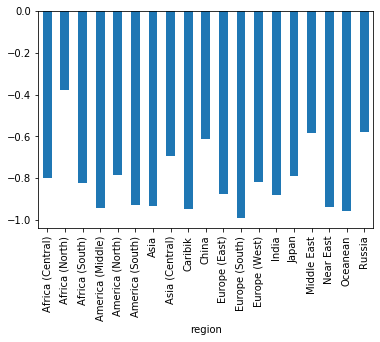

In [14]:
df_corr_fert_income = df_mean_fert_region_trans.corrwith(df_mean_income_region_trans, axis = 0) 
df_corr_fert_income.plot(kind='bar');

<a id='middleeast'></a>
## Middle East: If the income is shrinking does the fertility raise?
For the Middle East, we observe a breathtaking increase in income (to 16 times) over a period of about 15 years from the mid-1960s - followed by a dramatic fall in the early 80s (relapse to half). The reason for this is the rapid rise in oil prices, which culminated in the oil crisis in 1971 and 1979.

<a id='neareast'></a>
## Near East: If the income is stagnating on a low level why did fertility drop anywway?    
The Middle East achieved similarly small increases in income like the African continent in the same period.

<Figure size 432x288 with 0 Axes>

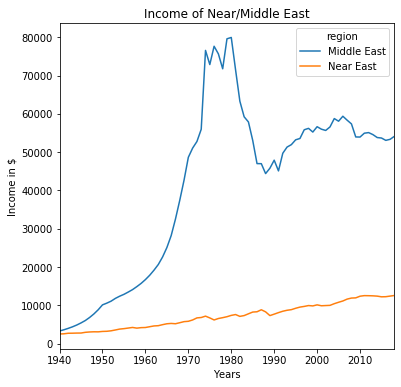

In [15]:
plot_regions(df_mean_income_region_trans, arr_east2, 'Income of Near/Middle East', 'Income in $');

Surprisingly, however, the birth rate curves are almost the same in both regions. They start to fall in the same period. The Middle East starts at a higher level and falls a little lower. The difference is about one baby per woman. What triggered the fall in birth rates in the Near East - although the income did not really increase? We should zoom down to the country level here.

What is remarkable about the Middle East data is that falling incomes in the early 1980s do not appear to affect the fall in birth rates at all. This is strong evidence against a causal relationship between income and birth rates. 

We can test this observation against other crises, for example the Asian crisis in the late 90s, or the state defaults in Russia and Argentina in the same period.

<Figure size 432x288 with 0 Axes>

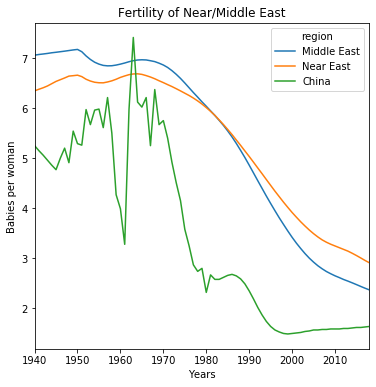

In [16]:
plot_regions(df_mean_fert_region_trans, arr_east, 'Fertility of Near/Middle East', 'Babies per woman')

<a id='zoomneareast'></a>
### Zoom in Near East
Can we get more clarity on the stagnating low income and the anyway falling birth rates in the near east region? Let's zoom on country level.

<Figure size 432x288 with 0 Axes>

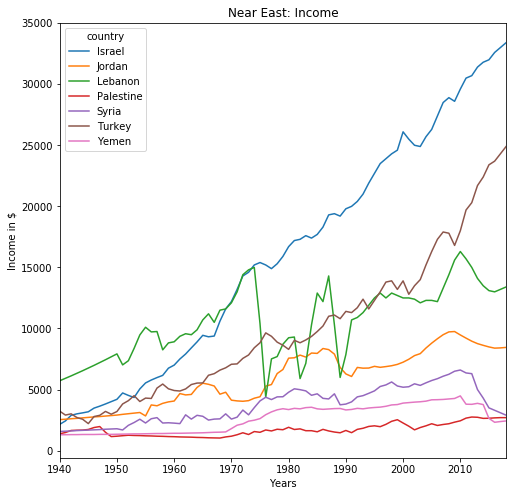

In [17]:
def plot_countries(df_data, region, title, xlabel, ylabel):
    """ Plotting countries within a given region
    
    Parameters:
    df_data (data frame): data frame with rows as countries and columns as years, regions are merged already
    region (string): region used for filtering the given data frame: only rows wich the given region are filtered
    title (string): title of the plot
    xlabel (string): label x axis
    ylabel (string): label y axis

    """
    df_region_countries = df_data[df_data['region']==region]
    df_region_countries.set_index('country', inplace=True)
    df_region_countries_time = df_region_countries.loc[:,'1940': '2018']
    df_region_countries_time_trans = df_region_countries_time.transpose()
    plt.figure()
    df_region_countries_time_trans.plot(kind='line', figsize=(8,8), title=title);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    
plot_countries(df_income_region, 'Near East', 'Near East: Income', 'Years', 'Income in $')

Lebanon could confirm the hypothesis of the raising income (above 10000 Dollar) as a triggering event for the falling birth rate. When the Civil War started around 1975 the income felt dramatically to far below the bare minimum. And so felt the birth rates as well. It is a kind of war pattern also shown later on for Russia in the World War II. But different to the WW II the Civil War in Lebanon never had a clear end. The dropping of birth rate continued to nowadays until it reached th European level.

<Figure size 432x288 with 0 Axes>

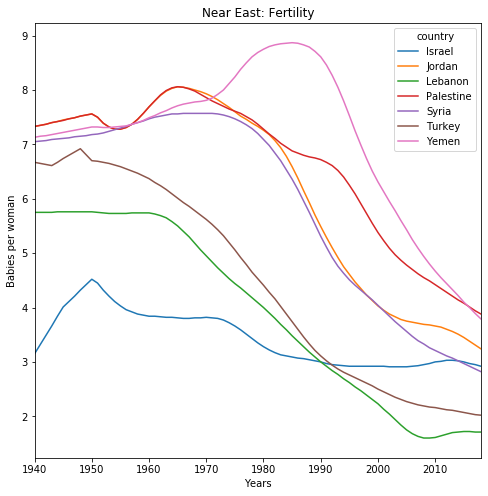

In [18]:
plot_countries(df_fert_region, 'Near East', 'Near East: Fertility', 'Years', 'Babies per woman')

<a id='africa'></a>
### Africa: Are there countries with low stagnating incomes and dropping birthrates?
North and South Africa both start at around 6.5 births around 1940 and decrease to around 2.5 in 2018. Central Africa can start above 6 births and falls less strongly than the north and south of the continent. Central Africa is only surpassed by South Asia in terms of both the starting value and the low drop (starts above 7 and drops to just below 6). It would therefore be worthwhile to take a closer look at the similarities between Central Africa and South Asia.


<Figure size 432x288 with 0 Axes>

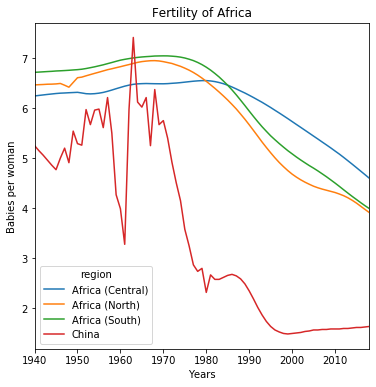

In [19]:
plot_regions(df_mean_fert_region_trans, arr_africa, 'Fertility of Africa', 'Babies per woman')

This minimal fall in the birth rate correlates with the scarcely increased income, especially in Central and South Africa. Income in these regions has not even doubled in 80 years. Only North Africa is better off with a fourfold increase during this period.

<Figure size 432x288 with 0 Axes>

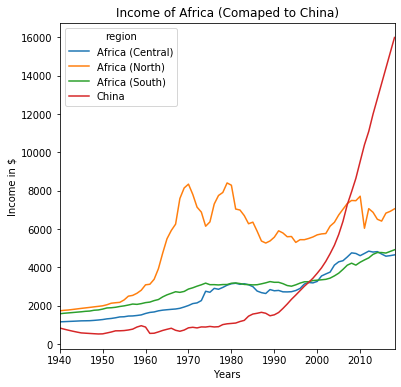

In [20]:
plot_regions(df_mean_income_region_trans, arr_africa, 'Income of Africa (Comaped to China)', 'Income in $')

If we combine the income of North Africa with the income of the Middle East, we make it clear how marginally the growth in income for Africa really was.

<Figure size 432x288 with 0 Axes>

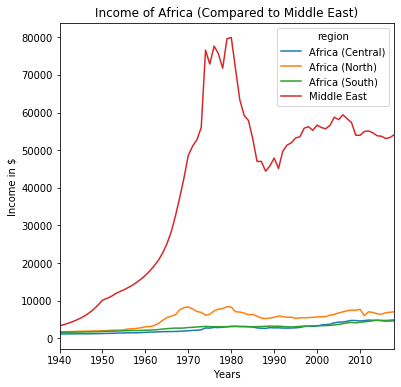

In [21]:
plot_regions(df_mean_income_region_trans, arr_africa2, 'Income of Africa (Compared to Middle East)', 'Income in $')

<a id='northafrica'></a>
### Zoom in North Africa: Why is the correlation between income and Birthrates the weakest of all regions?
As we kept in mind, the correlation between income and birth rate was the weakest in North Africa. So let's take a look at this region at country level.

<Figure size 432x288 with 0 Axes>

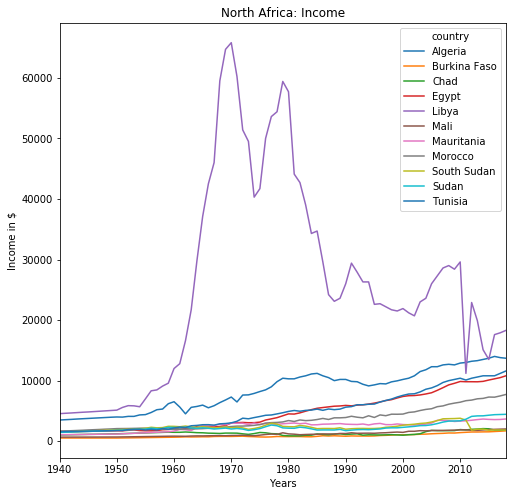

In [22]:
plot_countries(df_income_region, 'Africa (North)', 'North Africa: Income', 'Years', 'Income in $')

We have already seen the double peak like in the income curve for Libya - it is the same pattern as in the countries of the Middle East. Libya is also an oil state. In case of North Africa Lybia is the local champion which is shadowing the data for other North African countries. Lybia should be taken out of the region for this reason. We could consider a kind of artifical region of all OPEC states and compare their birthrates.

Compared to Libya, all other countries in this region seem to have a very similar income. This is misleading. We have the same two groups here (Sub-Saharan and Mediterranean) as we will see much more clearly when looking at the birth rates.

<Figure size 432x288 with 0 Axes>

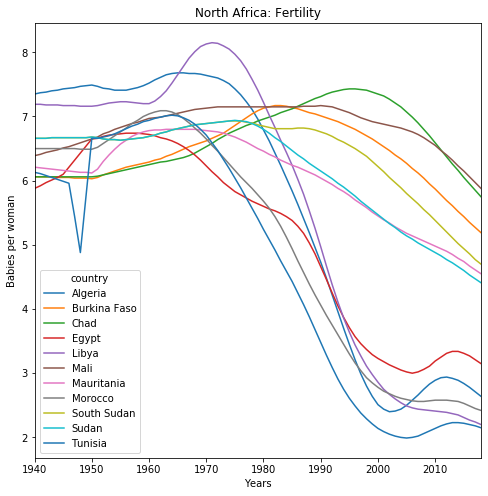

In [23]:
plot_countries(df_fert_region, 'Africa (North)', 'North Africa: Fertility', 'Years', 'Babies per woman')


If we look at birth rates, North Africa falls into two groups:The sub-Saharan groups Chad, Mali, Burkina Faso, South Sudan, Sudan and Mauretania start between 6 and 7 children and decrease by about one - while the Mediterranean group with Egypt, Algeria, Morocco, Libya and Tunisia shows a much larger drop in births from 7 to 8 down to 2 to 3.

Although Libya does not appear to belong to the Mediterranean group in terms of income, it does not differ in terms of birth rates from its neighboring countries.

<b>A strange correlation:</b>
And this is perhaps the most remarkable observation here: There is no inverse causation between income and birth rates (the more of one the less of the other). Rather, income seems to have to exceed a certain value to trigger the fall in birth rates. This value is very low - between 5,000 and 10,000 virtual dollars.

We have to test this thesis against other countries whose incomes range up to 10,000 dollars.

<a id='libya'></a>
### Zoom in Libya: Raising income and more babies

In [25]:
import numpy as np

def transform_country(df_data1, country, col1):
    df_data_country = df_data1[df_data1['country']==country]
    df_data_country = df_data_country.iloc[:, np.r_[0:1, 141:len(df_data_country.columns)-1]]
    df_data_country = transform(df_data_country)
    df_data_country.rename(columns= {country:country+" "+col1}, inplace=True) 
    return df_data_country

def merge_dataframes_country(df_data1, df_data2, col1, col2, country):
    df_data1 = transform_country(df_data1, country, col1)
    df_data2 = transform_country(df_data2, country, col2)
    df_region_merged = df_data1.merge(df_data2, how='inner', left_index=True, right_index=True)
    df_region_merged.head()
    return df_region_merged

<Figure size 432x288 with 0 Axes>

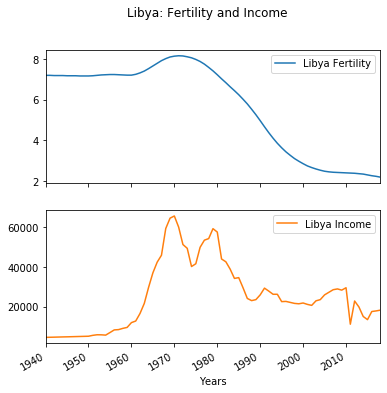

In [27]:
df_merged = merge_dataframes_country(df_fert_region, df_income_region, "Fertility", "Income", "Libya")
plot_in_parallel(df_merged, 'Years', 'Income in $', 'Libya: Fertility and Income')

<a id='oil'></a>
### Zoom in Oil States: Oil and Babies
As we have already seen for the oil countries in the Middle East, falling income has little impact on birth rates. This observation is confirmed by the sample of Gabon, Nigeria and Venezuela.

The comparison between Gabon and Nigeria is very interesting. Gabon shows the typical income pattern of the oil countries. Gabon and Nigeria are both in Central Africa. In Gabon, the birth rate drops significantly, similar to that in Venezuela and the Middle East. Nigeria's birth rate remains at a high level and this correlates to the fact that the average income did not cross the the magic income border of $ 10,000 we believed we found for North Africa. 

In [28]:
def plot_countries_timeframe(arr_states, df_in, title, xlabel, ylabel):
    """ Plotting a subset of given countries 
    
    Parameters:
    arr_states (array): array of states to be filtered for
    df_in (data frame): data frame with years as columns and countries as rows
    title (string): title of the plot
    xlabel (string): label x axis
    ylabel (string): label y axis

    """
    df_countries =  df_in[df_in['country'].isin(arr_states)]
    df_countries.set_index('country', inplace=True)
    df_countries_time = df_countries.loc[:,'1940': '2018']
    df_countries_time_trans = df_countries_time.transpose()
    plt.figure()
    df_countries_time_trans.plot(kind='line', figsize=(6,6), title=title);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

<Figure size 432x288 with 0 Axes>

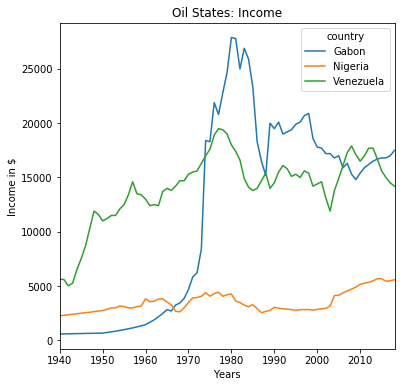

<Figure size 432x288 with 0 Axes>

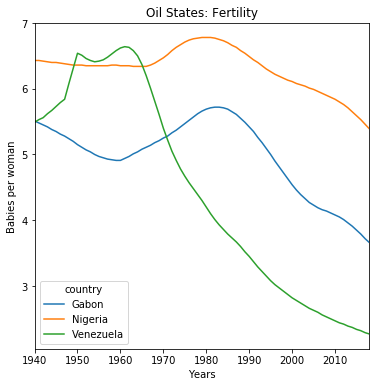

In [29]:
arr_other_oil_states = pd.array(['Nigeria', 'Venezuela', 'Gabon'], dtype=str)
plot_countries_timeframe(arr_other_oil_states, df_income_region, 'Oil States: Income', 'Years', 'Income in $')
plot_countries_timeframe(arr_other_oil_states, df_fert_region, 'Oil States: Fertility', 'Years', 'Babies per woman')

In case of Nigeria we would need to zoom in further to find out whether the birthrate is persisting on a high level since the oil income does not reach the larger part of the population. Below the country level Gapminder does not provide data. So we can't zoom in further at this point. The only hint could come from the Gini data. If the Gini index is high, we can assume that oil revenue will not reach the mass of the population. That means the majority of the population might be far more poor than the average income suggests. Let's compare the Gini indeces of Nigeria and Gabon.

In [30]:
df_gini[df_gini['country'] == 'Gabon'].dropna(axis=1)

,country,2005,2017
48,Gabon,42.2,38.0


In [31]:
df_gini[df_gini['country'] == 'Nigeria'].dropna(axis=1)

,country,1985,1992,1996,2003,2009
104,Nigeria,38.7,45.0,51.9,40.1,43.0


It turns out that there are no big differences between Nigeria and Gabon regarding the Gini index. Inequality might not be the best explaination of the differences between the birthrates of these two countries. 

<a id='asia'></a>
## Asia
Although all Asian regions were barely able to achieve an increase in income compared to the western regions and the oil countries, the birth rates in these regions starts to fall between the 1960s and 1970s. Asia in average as well as China broke through the income border of 10000 Dollar after the year 2010, Central Asia and India are still below that line. 

<Figure size 432x288 with 0 Axes>

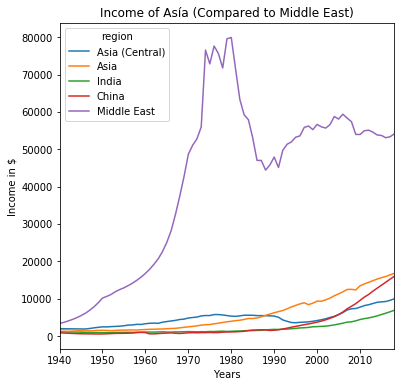

In [32]:
plot_regions(df_mean_income_region_trans, arr_asia2, 'Income of Asía (Compared to Middle East)', 'Income in $')

<Figure size 432x288 with 0 Axes>

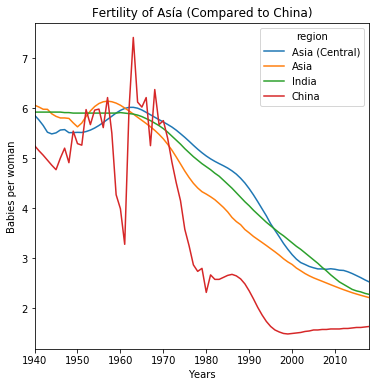

In [33]:
plot_regions(df_mean_fert_region_trans, arr_asia, 'Fertility of Asía (Compared to China)', 'Babies per woman')

<a id='china'></a>
### Zoom in China: When politics interferes ...
Between 1958 and 1960 the Great Leap Forward ended in a desastrous famine with 30 Million death and the birth rate dropped from 6 to 3 babies per woman. In the following five year the birth rates recovered and raised to almost 7 children. This raise was ended by the cultural revolution. This was the start of Chinas birth rate regulation. China's one-child policy was introduced 1979 after a period of two-childpolicy since the cultural revoultion 1966.

China's raising income starting from 1990 had no impact on the birth rate since it was overruled by law and social disadvantages. Therefore China can not be used neither for nor against the thesis of correlating income and birth rates.

<Figure size 432x288 with 0 Axes>

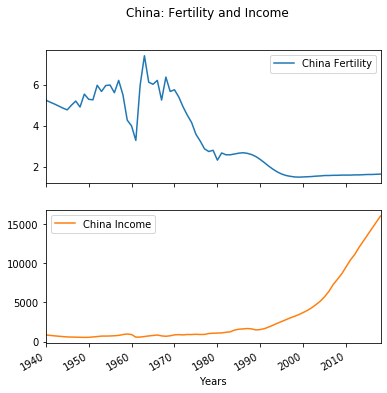

In [34]:
df_merged = merge_dataframes_country(df_fert_region, df_income_region, "Fertility", "Income", "China")
plot_in_parallel(df_merged, 'Years', 'Income in $', 'China: Fertility and Income')

<a id='japan'></a>
### Zoom in Japan
In the period 1945 - 1960 we have a sharp decline in birth rate although the income is stagnating on a very low level far beneath 10000 Dollar. This 

<Figure size 432x288 with 0 Axes>

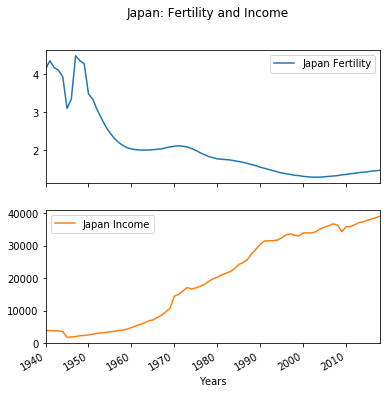

In [35]:
df_merged = merge_dataframes_country(df_fert_region, df_income_region, "Fertility", "Income", "Japan")
plot_in_parallel(df_merged, 'Years', 'Income in $', 'Japan: Fertility and Income')

<a id='america'></a>
## America

Average income in Central America and South America has not developed much better than income in Africa and Asia. The income in North America is about ten times the average in South America. Nevertheless, the birth rates in South and Central America fell just as strongly as those in the super-rich countries of the Middle East to just over 2 children per woman.

C:\Tools\Anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<Figure size 432x288 with 0 Axes>

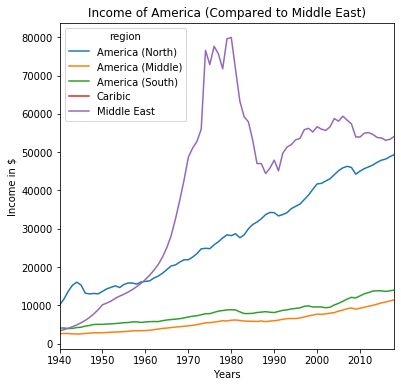

In [36]:
plot_regions(df_mean_income_region_trans, arr_america2, 'Income of America (Compared to Middle East)', 'Income in $')

<Figure size 432x288 with 0 Axes>

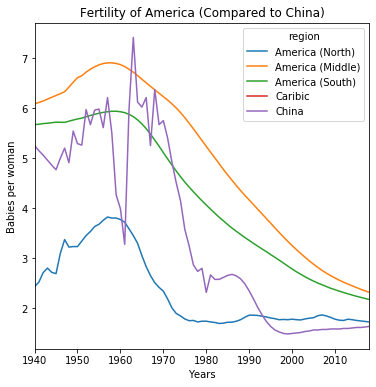

In [37]:
plot_regions(df_mean_fert_region_trans, arr_america, 'Fertility of America (Compared to China)', 'Babies per woman')

<a id='europe'></a>
## Europe

While Western European income increased fivefold, Eastern and Southern Europeans did not even reach half of Western European income. Nevertheless, the birth rates of the Eastern and Southern Europeans fell below that of the Western Europeans. 

The most interesting pattern is for Russia. It is worth taking a closer look at this case.

<Figure size 432x288 with 0 Axes>

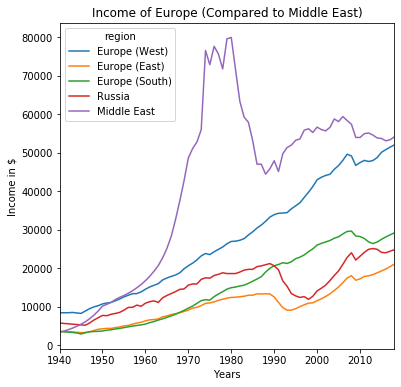

In [38]:
plot_regions(df_mean_income_region_trans, arr_europe2, 'Income of Europe (Compared to Middle East)', 'Income in $')

<Figure size 432x288 with 0 Axes>

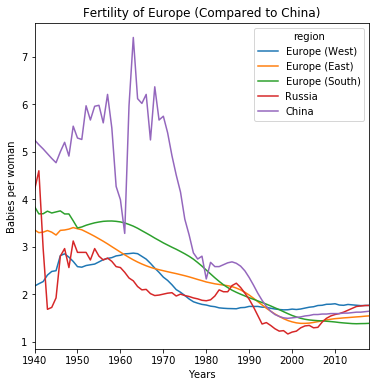

In [39]:
plot_regions(df_mean_fert_region_trans, arr_europe, 'Fertility of Europe (Compared to China)', 'Babies per woman')

<a id='russia'></a>
### Zoom in Russia: Fear and Income
The average income in Russia fell from 1989 during the entire system transformation period until the state went bankrupt in 1999. In the same period, the birth rate dropped very significantly to almost one child per woman. Interestingly, this loss of birth began in 1985, when Gorbartschow came to power. At this point in time, wages were not yet falling. This is an indication that birth rates decrease when wealth rises above a certain level, but also decrease when there is a fear of loss of income.

<Figure size 432x288 with 0 Axes>

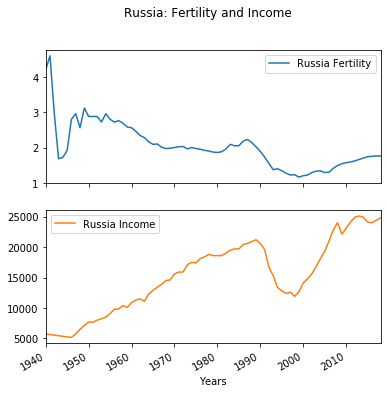

In [40]:
df_merged = merge_dataframes_country(df_fert_region, df_income_region, "Fertility", "Income", "Russia")
plot_in_parallel(df_merged, 'Years', 'Income in $', 'Russia: Fertility and Income')

<a id='conclusion'></a>
## Conclusion

<img src="images/conclusion1.png" width="400" height="400" align="right"><b>No causal relationship:</b>    
The relationship between income and birth rate is certainly not a causal one, because there are almost no examples that the birth rate would suddenly rise again if income fell significantly.

There are many examples that does not fit the negative causation, for instance rising birth rates combined with stagnating or raising income. For these examples it is likely to have other impacts than the income only. Rising birth rates can mainly be observed if births previously declined sharply due to a catastrophe (war, deep economic crisis). It is more likely to be a return to the pre-catastrophe level. It also only occurs when the situation actually relaxes.
Rising birth rates can also be an reaction to a threat from outside the country as observed for Israel (1940-1950), Libya (1960-1970) or Yemen (1970-1990)

Also there are many examples that the birth rates keep falling even when the income was falling as well. Best examples for this due to the huge loss of income are the two oil crisis in the 1970s. In almost all oil states the falling income had no impact on the falling birth rate.


<b>A strange correlation:</b>
In most countries worldwide the birth rates start dropping somewhen between 1960 and 1970. In most countries wordlwide income started raising in different speeds from 1940s until today.

From the observations of North Africa, we derive the hypothesis that rising incomes trigger the fall in the birth rate as soon as incomes exceed a certain limit. We arbitrarily set the magic limit at $ 10,000. The hypothesis was confirmed when we compared the two African oil countries Gabon and Nigeria. But we also found contradicting observations: The Near East Countries except Israel and very lately Turkey did not cross this limit but the birthrates dropped anyway.

At the end: A hypothesis which seemed to be so obvious when we only looked at the worldwide average gets much less convincing when we zoom into it and look more closely. It gets clear that we need much more explainations for the question: under which circumstances do people decide for or against having children.